In [9]:
from sklearn import ensemble
from sklearn import preprocessing
from sklearn import tree
from sklearn import model_selection
from sklearn import metrics
from sklearn import svm
from sklearn import linear_model
from sklearn import neighbors

In [2]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
x1 = np.random.uniform(-1, 1, 1000)
x2 = np.random.uniform(-1, 1, 1000)
x = np.vstack([x1, x2]).transpose()
x.shape

(1000, 2)

In [4]:
def f(x1_i, x2_i):
    return 2*(x1_i**2 + x2_i**2 <= 0.5) - 1

In [5]:
y = f(x1, x2)

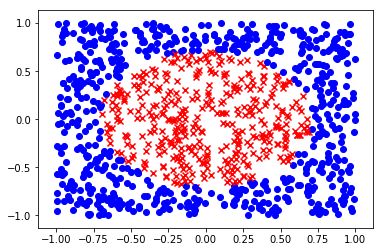

In [6]:
for (x1_i, x2_i) in zip(x1, x2):
    plt.scatter(x1_i, x2_i,
                c = ['blue' if f(x1_i, x2_i) == -1 else 'red'],
                marker='o' if f(x1_i, x2_i) == -1 else 'x')

In [7]:
X_train, X_test, y_train, y_test = model_selection.train_test_split(x, y, train_size=0.7, stratify=y)

/usr/lib/python3.7/site-packages/sklearn/model_selection/_split.py:2026: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


In [8]:
def perform_classification(model, data, name):
    X_train, X_test, y_train, y_test = data
    model.fit(X_train, y_train)
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    print('Model: {}'.format(name))
    print('Train report: {}'.format(metrics.classification_report(y_train, y_train_pred)))
    print('Test report: {}'.format(metrics.classification_report(y_train, y_train_pred)))

In [19]:
clf1 = neighbors.KNeighborsClassifier(n_neighbors=10)
clf2 = linear_model.LogisticRegression()
clf3 = svm.SVC(probability=True)
clf4 = tree.DecisionTreeClassifier()

In [20]:
estimators = [
    ('knn', clf1),
    ('lr', clf2),
    ('svc', clf3),
    ('dt', clf4),
]

In [27]:
clf = ensemble.VotingClassifier(estimators=estimators, voting='soft')

In [28]:
perform_classification(clf, (X_train, X_test, y_train, y_test), 'Voting ensemble')

Model: Voting ensemble
Train report:              precision    recall  f1-score   support

         -1       1.00      1.00      1.00       434
          1       1.00      1.00      1.00       266

avg / total       1.00      1.00      1.00       700

Test report:              precision    recall  f1-score   support

         -1       1.00      1.00      1.00       434
          1       1.00      1.00      1.00       266

avg / total       1.00      1.00      1.00       700



In [30]:
print('Number of created estimators: {}'.format(len(clf.estimators_)))

Number of created estimators: 4
Number of created estimators: {'knn': KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=10, p=2,
           weights='uniform'), 'lr': LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False), 'svc': SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=True, random_state=None, shrinking=True,
  tol=0.001, verbose=False), 'dt': DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
         

In [32]:
print('Estimators: {}'.format(clf.named_estimators))

Estimators: {'knn': KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=10, p=2,
           weights='uniform'), 'lr': LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False), 'svc': SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=True, random_state=None, shrinking=True,
  tol=0.001, verbose=False), 'dt': DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, ra

In [37]:
print('Klase u klasifikaciji: {}'.format(clf.classes_))

Klase u klasifikaciji: [-1  1]
